# Import Library

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [381]:
path = "/Users/irene/CloudStation/Portfolio/Bank Customer Churn Data Analysis/churn_prediction.csv"
df = pd.read_csv(path)

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [383]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


# Exploratory Data Analysis

## Typecasting

### int / category

In [384]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

By looking at the data,

* Integer: customer_id (unique number) / Age / vintage / dependents

* Float: current_balance / previous_month_end_balance / average_monthly_balance_prevQ / average_monthly_balance_prevQ / current_month_credit / previous_month_credit / current_month_debit / previous_month_debit / current_month_balance / previous_month_balance             

* Category: gender / occupation / city / customer_nw_category / branch_code / churn

* Datetime: last_transaction


In [385]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [401]:
df['churn'] = df['churn'].astype('category')
df['branch_code'] = df['branch_code'].astype('int64')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')
df['city'] = df['city'].astype('int64')
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['dependents'] = df['dependents'].astype('int64')

In [ ]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                                 Int64
customer_nw_category              category
branch_code                          Int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

### datetime

In [ ]:
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
df['week_of_year'] = df['last_transaction'].dt.isocalendar().week
df['day_of_year'] = df['last_transaction'].dt.dayofyear
df['month_of_year'] = df['last_transaction'].dt.month
df['day_of_week'] = df['last_transaction'].dt.dayofweek

In [ ]:
df['week_of_year'] = df['week_of_year'].astype('float64')

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customer_id                     28382 non-null  int64   
 1   vintage                         28382 non-null  int64   
 2   age                             28382 non-null  int64   
 3   gender                          27857 non-null  object  
 4   dependents                      25919 non-null  float64 
 5   occupation                      28302 non-null  object  
 6   city                            27579 non-null  float64 
 7   customer_nw_category            28382 non-null  category
 8   branch_code                     28382 non-null  int64   
 9   current_balance                 28382 non-null  float64 
 10  previous_month_end_balance      28382 non-null  float64 
 11  average_monthly_balance_prevQ   28382 non-null  float64 
 12  average_monthly_ba

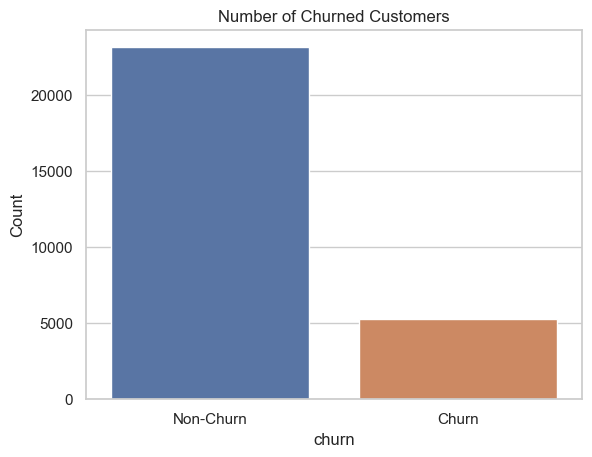

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get value counts for 'churn' column
value_counts = df['churn'].value_counts()


# Set seaborn style
sns.set(style="whitegrid")

# Create bar plot using seaborn
sns.barplot(x=value_counts.index, y=value_counts.values)

# Set x-tick labels
plt.xticks(value_counts.index, ['Non-Churn', 'Churn'])

# Add labels and title
plt.ylabel('Count')
plt.title('Number of Churned Customers')

# Show the plot
plt.show()



In [390]:
df1 = df.dropna()


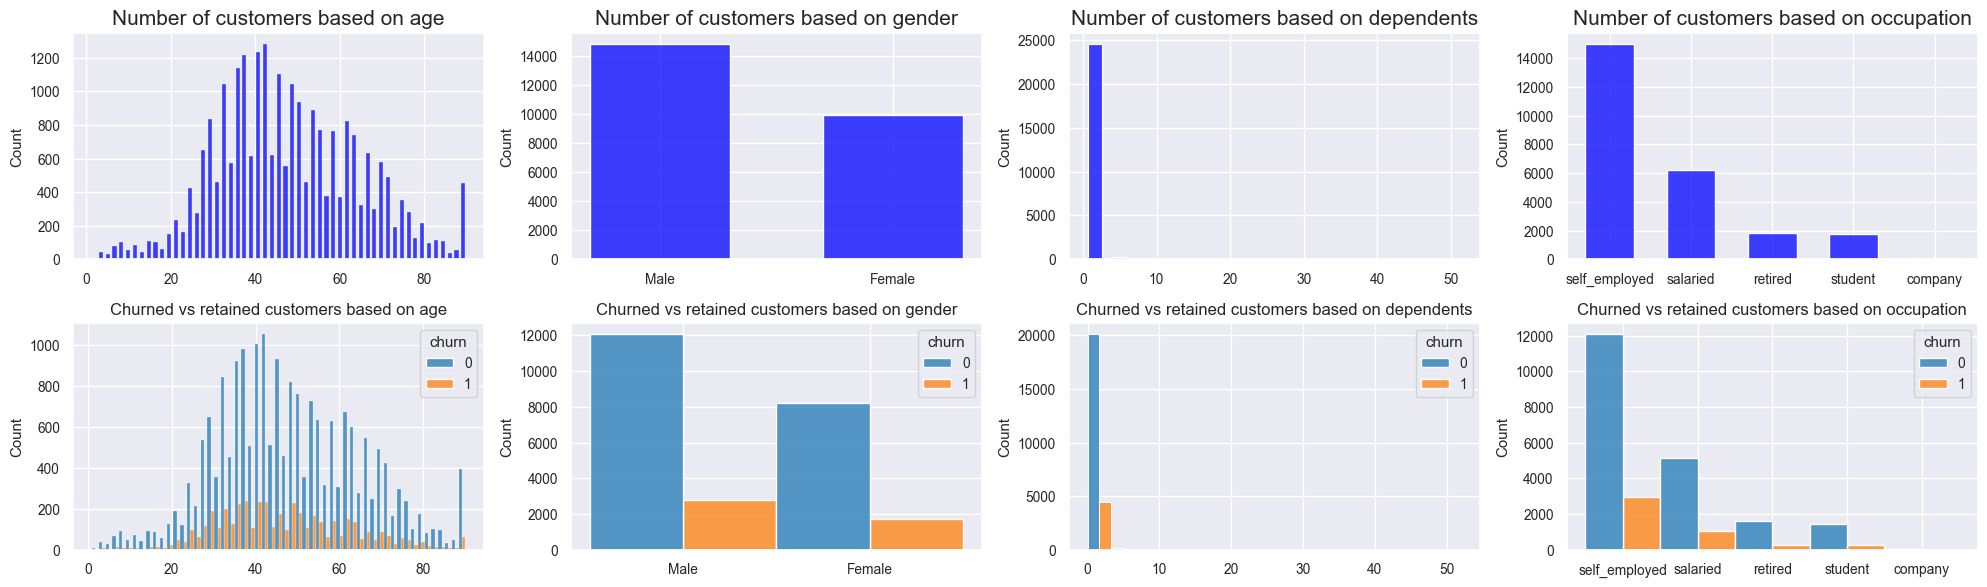

In [344]:
## Determine the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
social_columns = ['age','gender','dependents','occupation']

fig, axes = plt.subplots(2,4, figsize=(20,6))

axes=axes.flatten()
for i, col in enumerate(social_columns):
    ## Determine the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
    sns.histplot(data=df1, x=col, multiple='dodge', legend=False, color='blue', shrink=0.6, ax=axes[i])
    axes[i].set_title('Number of customers based on {}'.format(col), fontsize=15)
    axes[i].set_xlabel(xlabel='')
    ## Plot the relationship between 'age', 'gender', 'dependents', 'occupation', and 'churn'
    sns.histplot(data=df1, x=col, hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), shrink=1, ax=axes[i+4])
    axes[i+4].set_title('Churned vs retained customers based on {}'.format(col).replace('_', ' '), fontsize=12)
    axes[i+4].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

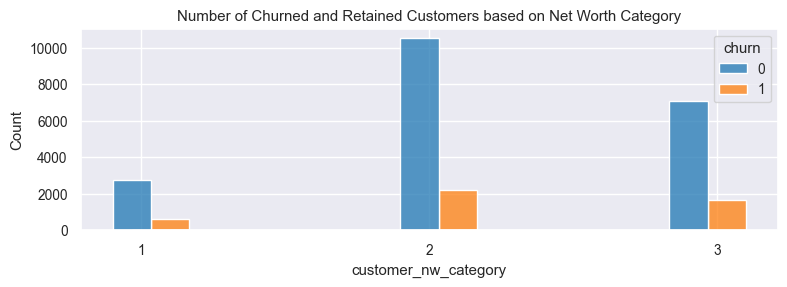

In [345]:
fig = plt.subplots(1,1, figsize=(8,3))

## Plot the relationship between 'customer_nw_category' and 'churn'
sns.histplot(data=df1, x='customer_nw_category', hue='churn', multiple='dodge', shrink=4, palette=sns.color_palette('tab10', 2))
plt.xticks([1,2,3])
plt.title('Number of Churned and Retained Customers based on Net Worth Category')

plt.tight_layout()
plt.show()

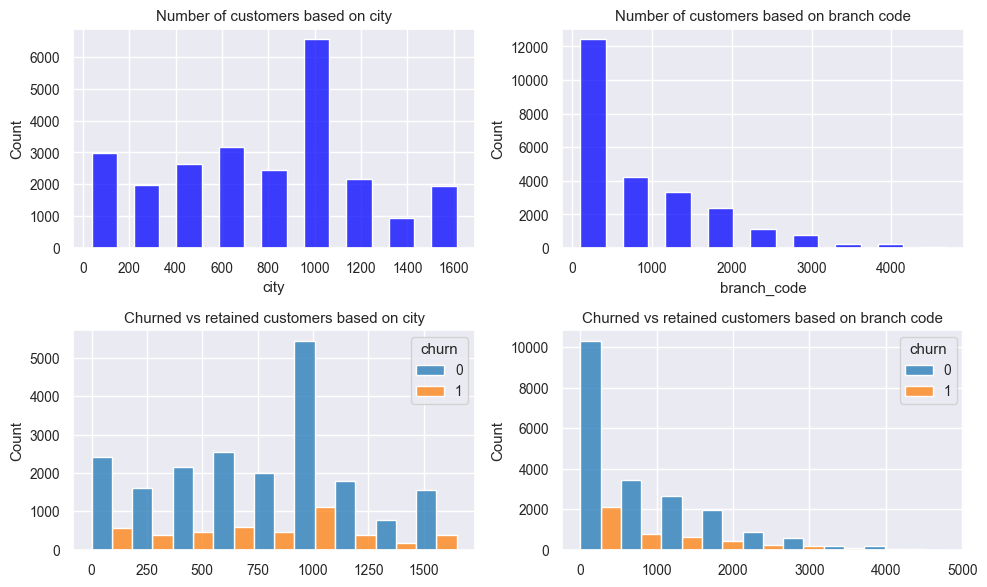

In [391]:
loc_columns = ['city','branch_code']

fig, axes = plt.subplots(2,2, figsize=(10,6))

axes=axes.flatten()

for i, col in enumerate(loc_columns):
    ## Determine the number of customers based on 'city', and 'branch_code'
    sns.histplot(data=df1, x=col, multiple='dodge', color='blue', bins=9, shrink=0.6, ax=axes[i])
    axes[i].set_title('Number of customers based on {}'.format(col).replace('_', ' '))
    ## Plot relationship between 'city', 'branch code', and 'churn'
    sns.histplot(data=df1, x=col, hue='churn', palette=sns.color_palette('tab10', 2), multiple='dodge', bins=9, shrink=1, ax=axes[i+2])
    axes[i+2].set_title('Churned vs retained customers based on {}'.format(col).replace('_', ' '))
    axes[i+2].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

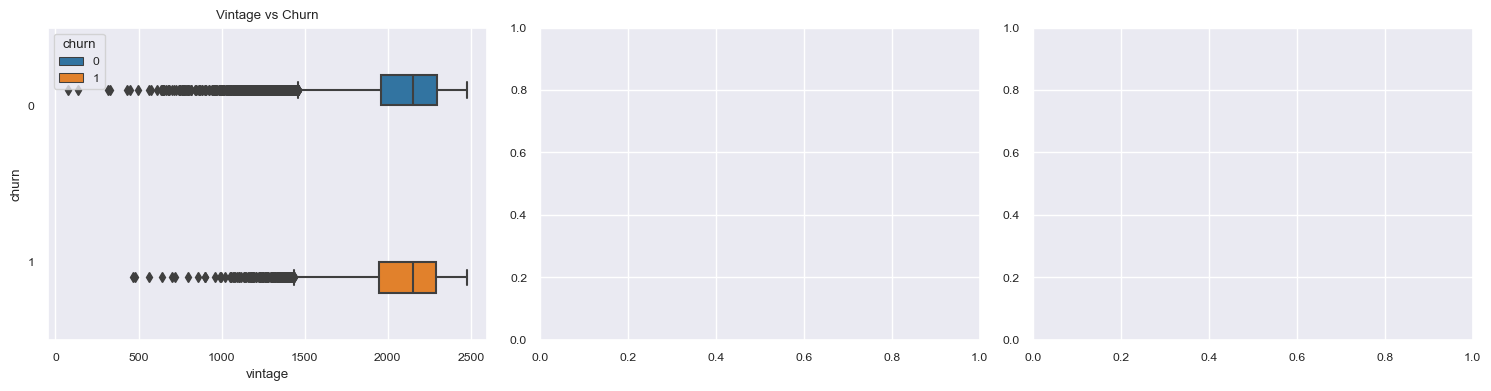

In [395]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.set(font_scale=0.8)

## Plot the relationship between 'vintage' and 'churn'
sns.boxplot(data=df1, x='vintage', y='churn', hue='churn', palette=sns.color_palette('tab10', 2), orient='h', width=0.4, ax=axes[0])
axes[0].set_title('Vintage vs Churn')

plt.tight_layout()
plt.show()

# Data Cleaning

## Duplicates

In [207]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

There's no any duplcates in the data

## Missing values

In [208]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                  3223
week_of_year                      3223
day_of_year                       3223
month_of_year                     3223
day_of_week                       3223
dtype: int64

There are missing values in some columns

We will drop the columns with missing values as we already have enough data size for our model.

In [209]:
df = df.dropna()

In [210]:
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
week_of_year                      0
day_of_year                       0
month_of_year                     0
day_of_week                       0
dtype: int64

In [211]:
len(df)

22067

In [212]:
df.to_csv("cleaned_data.csv")